# WebScraping Data to Perform EDA

In [5]:
import requests
from bs4 import BeautifulSoup
import csv

url = "https://www.foxsports.com/soccer/fifa-world-cup/history"
page = requests.get(url)
soup = BeautifulSoup(page.text, "html.parser")
table = soup.find("table", {"class": "data-table"})

headers = []
values_list = []
final_list = []

for i in table.find_all("th"):
    title = i.text.strip()
    headers.append(title)
headers[0] = "Year"
xd = soup.find("tbody", {"class": "row-data"})
for x in xd.find_all("tr"):
    values = []
    for y in str(x.text.strip()).split("\n"):
        y = y.strip()
        if y == "":
            continue
        values.append(y)
    values_list.append(values)

for v in values_list:
    kuchbhi = {}
    count = 0
    for x in v:
        kuchbhi[headers[count]] = x
        count = count + 1
    if len(kuchbhi) == 0:
        pass
    final_list.append(kuchbhi)

#print(final_list)

field_names = final_list[0].keys()
filename = "fifa.csv"
with open(filename, 'w', newline='') as f:
    # create a DictWriter object
    writer = csv.DictWriter(f, fieldnames=field_names)

    # write the headers
    writer.writeheader()

    # write the data
    for row in final_list:
        writer.writerow(row)


# Importing All Libraries which are Required to Perform Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Reading CSV file Which is generated After Web Scraping

In [9]:
df = pd.read_csv("fifa.csv")
df

,Year,CHAMPION,RUNNER UP,THIRD PLACE,HOST,TEAMS,MATCHES,GOALS
0,2022,Argentina,France,Croatia,Qatar,32,64,172
1,2018,France,Croatia,Belgium,Russia,32,64,169
2,2014,Germany,Argentina,Netherlands,Brazil,32,64,171
3,2010,Spain,Netherlands,Germany,South Africa,32,64,145
4,2006,Italy,France,Germany,Germany,32,64,147
5,2002,Brazil,Germany,Turkey,"South Korea, Japan",32,64,161
6,1998,France,Brazil,Croatia,France,32,64,171
7,1994,Brazil,Italy,Sweden,United States,24,52,141
8,1990,Germany,Argentina,Italy,Italy,24,52,115
9,1986,Argentina,Germany,France,Mexico,24,52,132


# To Display the First five rows from the dataset

In [7]:
df.head()

,Year,CHAMPION,RUNNER UP,THIRD PLACE,HOST,TEAMS,MATCHES,GOALS
0,2022,Argentina,France,Croatia,Qatar,32,64,172
1,2018,France,Croatia,Belgium,Russia,32,64,169
2,2014,Germany,Argentina,Netherlands,Brazil,32,64,171
3,2010,Spain,Netherlands,Germany,South Africa,32,64,145
4,2006,Italy,France,Germany,Germany,32,64,147


# To Display the last five rows from the dataset

In [10]:
df.tail()

,Year,CHAMPION,RUNNER UP,THIRD PLACE,HOST,TEAMS,MATCHES,GOALS
17,1954,Germany,Hungary,Austria,Switzerland,16,26,140
18,1950,Uruguay,Brazil,Sweden,Brazil,13,22,88
19,1938,Italy,Hungary,Brazil,France,15,18,84
20,1934,Italy,Czechia,Germany,Italy,16,17,70
21,1930,Uruguay,Argentina,United States,Uruguay,13,16,70


# To display the Datatypes of the Columns

In [11]:
df.dtypes

Year            int64
CHAMPION       object
RUNNER UP      object
THIRD PLACE    object
HOST           object
TEAMS           int64
MATCHES         int64
GOALS           int64
dtype: object

# To display number of entries and information in the dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         22 non-null     int64 
 1   CHAMPION     22 non-null     object
 2   RUNNER UP    22 non-null     object
 3   THIRD PLACE  22 non-null     object
 4   HOST         22 non-null     object
 5   TEAMS        22 non-null     int64 
 6   MATCHES      22 non-null     int64 
 7   GOALS        22 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 1.5+ KB


# To display the Descriptive Statictics of the Dataset

In [13]:
df.describe()

,Year,TEAMS,MATCHES,GOALS
count,22.000000,22.000000,22.000000,22.000000
mean,1978.909091,22.227273,43.727273,123.636364
std,27.738419,7.602830,17.776876,34.841882
min,1930.000000,13.000000,16.000000,70.000000
25%,1959.000000,16.000000,32.000000,90.500000
50%,1980.000000,20.000000,45.000000,129.000000
75%,2001.000000,32.000000,64.000000,146.750000
max,2022.000000,32.000000,64.000000,172.000000


# Checking the null values in Dataset

In [15]:
df.isna().sum()

Year           0
CHAMPION       0
RUNNER UP      0
THIRD PLACE    0
HOST           0
TEAMS          0
MATCHES        0
GOALS          0
dtype: int64

# 1. Which is the best team in world cup

In [16]:
#Analytical
df["CHAMPION"].value_counts()

Brazil       5
Germany      4
Italy        4
Argentina    3
Uruguay      2
France       2
England      1
Spain        1
Name: CHAMPION, dtype: int64

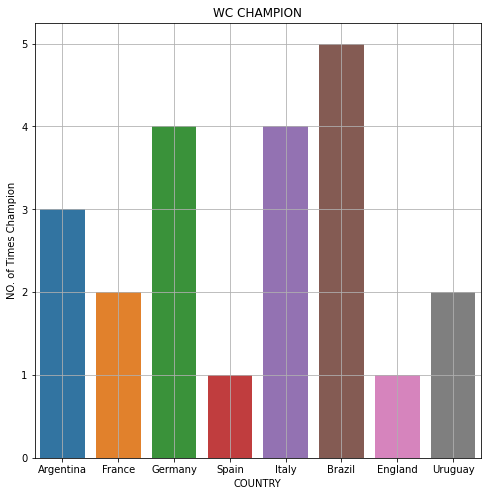

In [22]:
#Graphical
plt.figure(figsize=(8,8))

sns.countplot(data=df, x="CHAMPION")

plt.title("WC CHAMPION")
plt.xlabel("COUNTRY")
plt.ylabel("NO. of Times Champion")
plt.grid(True)

plt.show()

Brazil is the best team in wc history.

# 2.Country Winning the WorldCup After 2000

In [27]:
#Analytical
df[df['Year']>2000]['CHAMPION'].value_counts()

France       1
Spain        1
Argentina    1
Brazil       1
Germany      1
Italy        1
Name: CHAMPION, dtype: int64

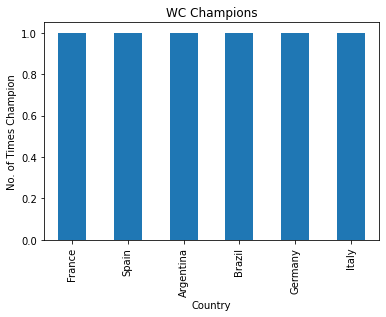

In [28]:
#Graphical
df[df['Year']>2000]['CHAMPION'].value_counts().plot(kind="bar")
plt.title("WC Champions")
plt.ylabel("No. of Times Champion")
plt.xlabel("Country")
plt.show()

# 3.Which is the best team in 90's era

In [29]:
#Analytical
df[df['Year']<2000]['CHAMPION'].value_counts()

Brazil       4
Germany      3
Italy        3
Uruguay      2
Argentina    2
France       1
England      1
Name: CHAMPION, dtype: int64

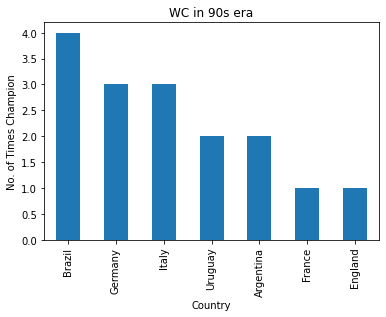

In [33]:
#Graphical
df[df['Year']<2000]['CHAMPION'].value_counts().plot(kind="bar")
plt.title("WC in 90s era")
plt.ylabel("No. of Times Champion")
plt.xlabel("Country")
plt.show()

Brazil is the best team in 90's era


# 4.Host winning world cup

In [35]:
df[df["HOST"]==df["CHAMPION"]]

,Year,CHAMPION,RUNNER UP,THIRD PLACE,HOST,TEAMS,MATCHES,GOALS
6,1998,France,Brazil,Croatia,France,32,64,171
11,1978,Argentina,Netherlands,Brazil,Argentina,16,38,102
14,1966,England,Germany,Portugal,England,16,32,89
20,1934,Italy,Czechia,Germany,Italy,16,17,70
21,1930,Uruguay,Argentina,United States,Uruguay,13,16,70


Only six times host country win the wc.

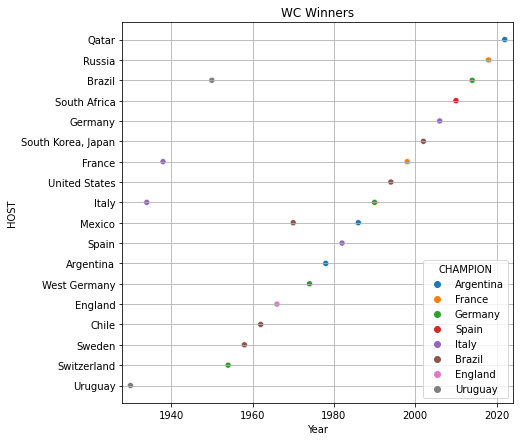

In [42]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x="Year",y="HOST",hue="CHAMPION")
plt.xlim(1928,2024)
plt.grid()
plt.title("WC Winners")
plt.show()

# 5.Which country host most no. of world cup

In [43]:
df["HOST"].value_counts()

Brazil                2
France                2
Mexico                2
Italy                 2
Uruguay               1
United States         1
Russia                1
Sweden                1
Spain                 1
England               1
Qatar                 1
South Korea, Japan    1
Germany               1
Switzerland           1
Argentina             1
South Africa          1
Chile                 1
West Germany          1
Name: HOST, dtype: int64

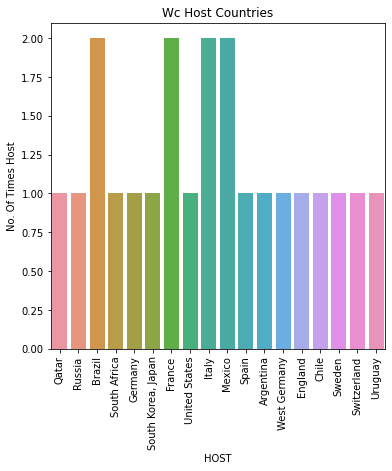

In [52]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x="HOST")
plt.title("Wc Host Countries")
plt.ylabel("No. Of Times Host")
plt.xticks(rotation=90)
plt.show()

Brazil, France, Italy, Mexico host most no. of Wc that is two times.

# 6.No. of goals scored per year and average goals per game per year increasing or not ?

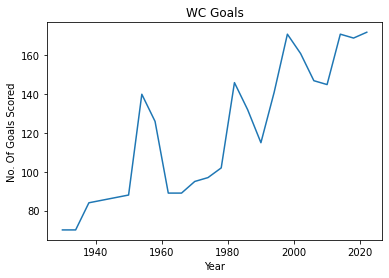

In [57]:
plt.plot(df["Year"],df["GOALS"])
plt.title("WC Goals")
plt.xlabel("Year")
plt.ylabel("No. Of Goals Scored")
plt.show()

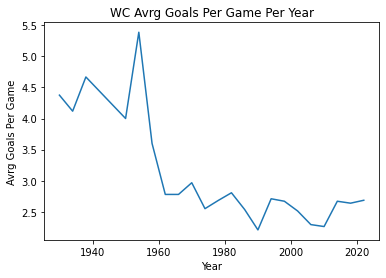

In [58]:
df['Avg_Goals_Per_Game'] = df["GOALS"] / df["MATCHES"]
plt.plot(df["Year"],df['Avg_Goals_Per_Game'])
plt.title("WC Avrg Goals Per Game Per Year")
plt.xlabel("Year")
plt.ylabel("Avrg Goals Per Game")
plt.show()

Goals Scored per year is increasing.

# 7.No.of Matches per year

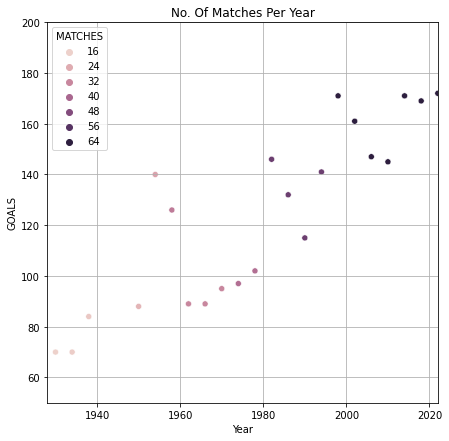

In [77]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x="Year",y="GOALS",hue="MATCHES")
plt.title("No. Of Matches Per Year")
plt.ylim(50,200)
plt.xlim(1928,2022)
plt.grid()

no. of matches played per year is increasing.

# 8.Max and min no. of goals scored in which year ?

In [84]:
# Find the maximum number of goals scored in a year
max_goals = df.loc[df['GOALS'].idxmax()]
print("Maximum number of goals scored in year:", max_goals['Year'])

# Find the minimum number of goals scored in a year
min_goals = df.loc[df['GOALS'].idxmin()]
print("Minimum number of goals scored in year:", min_goals['Year'])


Maximum number of goals scored in year: 2022
Minimum number of goals scored in year: 1934


# 9.France wins world cup in which years.

In [91]:
df[df['CHAMPION']=='France']['Year']

1    2018
6    1998
Name: Year, dtype: int64

In [93]:
df[(df["CHAMPION"] == "France")]

,Year,CHAMPION,RUNNER UP,THIRD PLACE,HOST,TEAMS,MATCHES,GOALS,Avg_Goals_Per_Game
1,2018,France,Croatia,Belgium,Russia,32,64,169,2.640625
6,1998,France,Brazil,Croatia,France,32,64,171,2.671875


france wins wc in 1938 and 2018.

# 10.Italy Uruguay and argentina wins world cup in which years

In [95]:
df[(df["CHAMPION"] == "Italy") | (df["CHAMPION"] == "Uruguay") | (df["CHAMPION"] == "Argentina") ]

,Year,CHAMPION,RUNNER UP,THIRD PLACE,HOST,TEAMS,MATCHES,GOALS,Avg_Goals_Per_Game
0,2022,Argentina,France,Croatia,Qatar,32,64,172,2.687500
4,2006,Italy,France,Germany,Germany,32,64,147,2.296875
9,1986,Argentina,Germany,France,Mexico,24,52,132,2.538462
10,1982,Italy,Germany,Poland,Spain,24,52,146,2.807692
11,1978,Argentina,Netherlands,Brazil,Argentina,16,38,102,2.684211
18,1950,Uruguay,Brazil,Sweden,Brazil,13,22,88,4.000000
19,1938,Italy,Hungary,Brazil,France,15,18,84,4.666667
20,1934,Italy,Czechia,Germany,Italy,16,17,70,4.117647
21,1930,Uruguay,Argentina,United States,Uruguay,13,16,70,4.375000


Italy wins wc in 1934,1938,1982,2006, Uruguay wins wc in 1930,1950, Argentina wins wc in 1978,1986,2022

# 11.Brazil, Italy, Sweden Runner Up in which years?

In [115]:
df[df["RUNNER UP"].isin(["Brazil","Italy","Sweden"])]

,Year,CHAMPION,RUNNER UP,THIRD PLACE,HOST,TEAMS,MATCHES,GOALS,Avg_Goals_Per_Game
6,1998,France,Brazil,Croatia,France,32,64,171,2.671875
7,1994,Brazil,Italy,Sweden,United States,24,52,141,2.711538
13,1970,Brazil,Italy,Germany,Mexico,16,32,95,2.968750
16,1958,Brazil,Sweden,France,Sweden,16,35,126,3.600000
18,1950,Uruguay,Brazil,Sweden,Brazil,13,22,88,4.000000


Brazil runner up in 1950,1998, Italy runner up in 1970,1994, Sweden runner up in 1958

# 12.United States finished at third place in which year?

In [107]:
df[df["THIRD PLACE"].str.contains("United States")]

,Year,CHAMPION,RUNNER UP,THIRD PLACE,HOST,TEAMS,MATCHES,GOALS,Avg_Goals_Per_Game
21,1930,Uruguay,Argentina,United States,Uruguay,13,16,70,4.375


United States finished at third place in 1930.

# 13.who is the inaugural world cup winner.

In [99]:
df[df["Year"]==1930]["CHAMPION"]

21    Uruguay
Name: CHAMPION, dtype: object

Uruguay is the inaugaral wc winner.

# 14.How many times unique team wins world cup ?

In [104]:
df.CHAMPION.nunique()

8

there are 8 occasions when new team wins wc.

In [109]:
df["CHAMPION"].value_counts()

Brazil       5
Germany      4
Italy        4
Argentina    3
Uruguay      2
France       2
England      1
Spain        1
Name: CHAMPION, dtype: int64

In [110]:
df["RUNNER UP"].value_counts()

Germany        4
Netherlands    3
Argentina      3
Hungary        2
France         2
Italy          2
Czechia        2
Brazil         2
Croatia        1
Sweden         1
Name: RUNNER UP, dtype: int64

In [111]:
# Brazil wins world cup 5 times.
# Total appearance in world cup final 7 times.
chances = 5*100/7
chances

71.42857142857143

In [112]:
# Italy wins world cup 4 times.
# Total appearance in world cup final 6 times.
chances1 = 4*100/6
chances1

66.66666666666667

In [114]:
# Only 6 times host wins the cup final.
# Total world cups tornament organized 22 times.
chances2 = 6*100/21
chances2

28.571428571428573

# Conclusion

# THANK YOU